# Bessel Functions: Theory and Computational Analysis

## Introduction

Bessel functions are canonical solutions to Bessel's differential equation:

$$x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - n^2)y = 0$$

where $n$ is the order of the Bessel function. These functions arise naturally in problems with cylindrical or spherical symmetry, including:

- Heat conduction in cylindrical objects
- Electromagnetic waves in cylindrical waveguides
- Vibrations of circular membranes
- Quantum mechanics of the hydrogen atom

## Types of Bessel Functions

### Bessel Functions of the First Kind $J_n(x)$

The Bessel function of the first kind of order $n$ is defined by the series:

$$J_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \, \Gamma(m+n+1)} \left(\frac{x}{2}\right)^{2m+n}$$

For integer orders, this simplifies to:

$$J_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \, (m+n)!} \left(\frac{x}{2}\right)^{2m+n}$$

### Bessel Functions of the Second Kind $Y_n(x)$

Also known as Neumann functions or Weber functions, these are linearly independent solutions:

$$Y_n(x) = \frac{J_n(x) \cos(n\pi) - J_{-n}(x)}{\sin(n\pi)}$$

For integer $n$, this is defined as a limit.

### Modified Bessel Functions

The modified Bessel functions $I_n(x)$ and $K_n(x)$ satisfy:

$$x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} - (x^2 + n^2)y = 0$$

They are related to the standard Bessel functions by:

$$I_n(x) = i^{-n} J_n(ix)$$

## Key Properties

### Recurrence Relations

$$J_{n-1}(x) + J_{n+1}(x) = \frac{2n}{x} J_n(x)$$

$$J_{n-1}(x) - J_{n+1}(x) = 2 J_n'(x)$$

### Orthogonality

$$\int_0^1 x J_n(\alpha_{nm} x) J_n(\alpha_{nk} x) \, dx = \frac{1}{2} [J_{n+1}(\alpha_{nm})]^2 \delta_{mk}$$

where $\alpha_{nm}$ are the zeros of $J_n(x)$.

### Asymptotic Behavior

For large $x$:

$$J_n(x) \approx \sqrt{\frac{2}{\pi x}} \cos\left(x - \frac{n\pi}{2} - \frac{\pi}{4}\right)$$

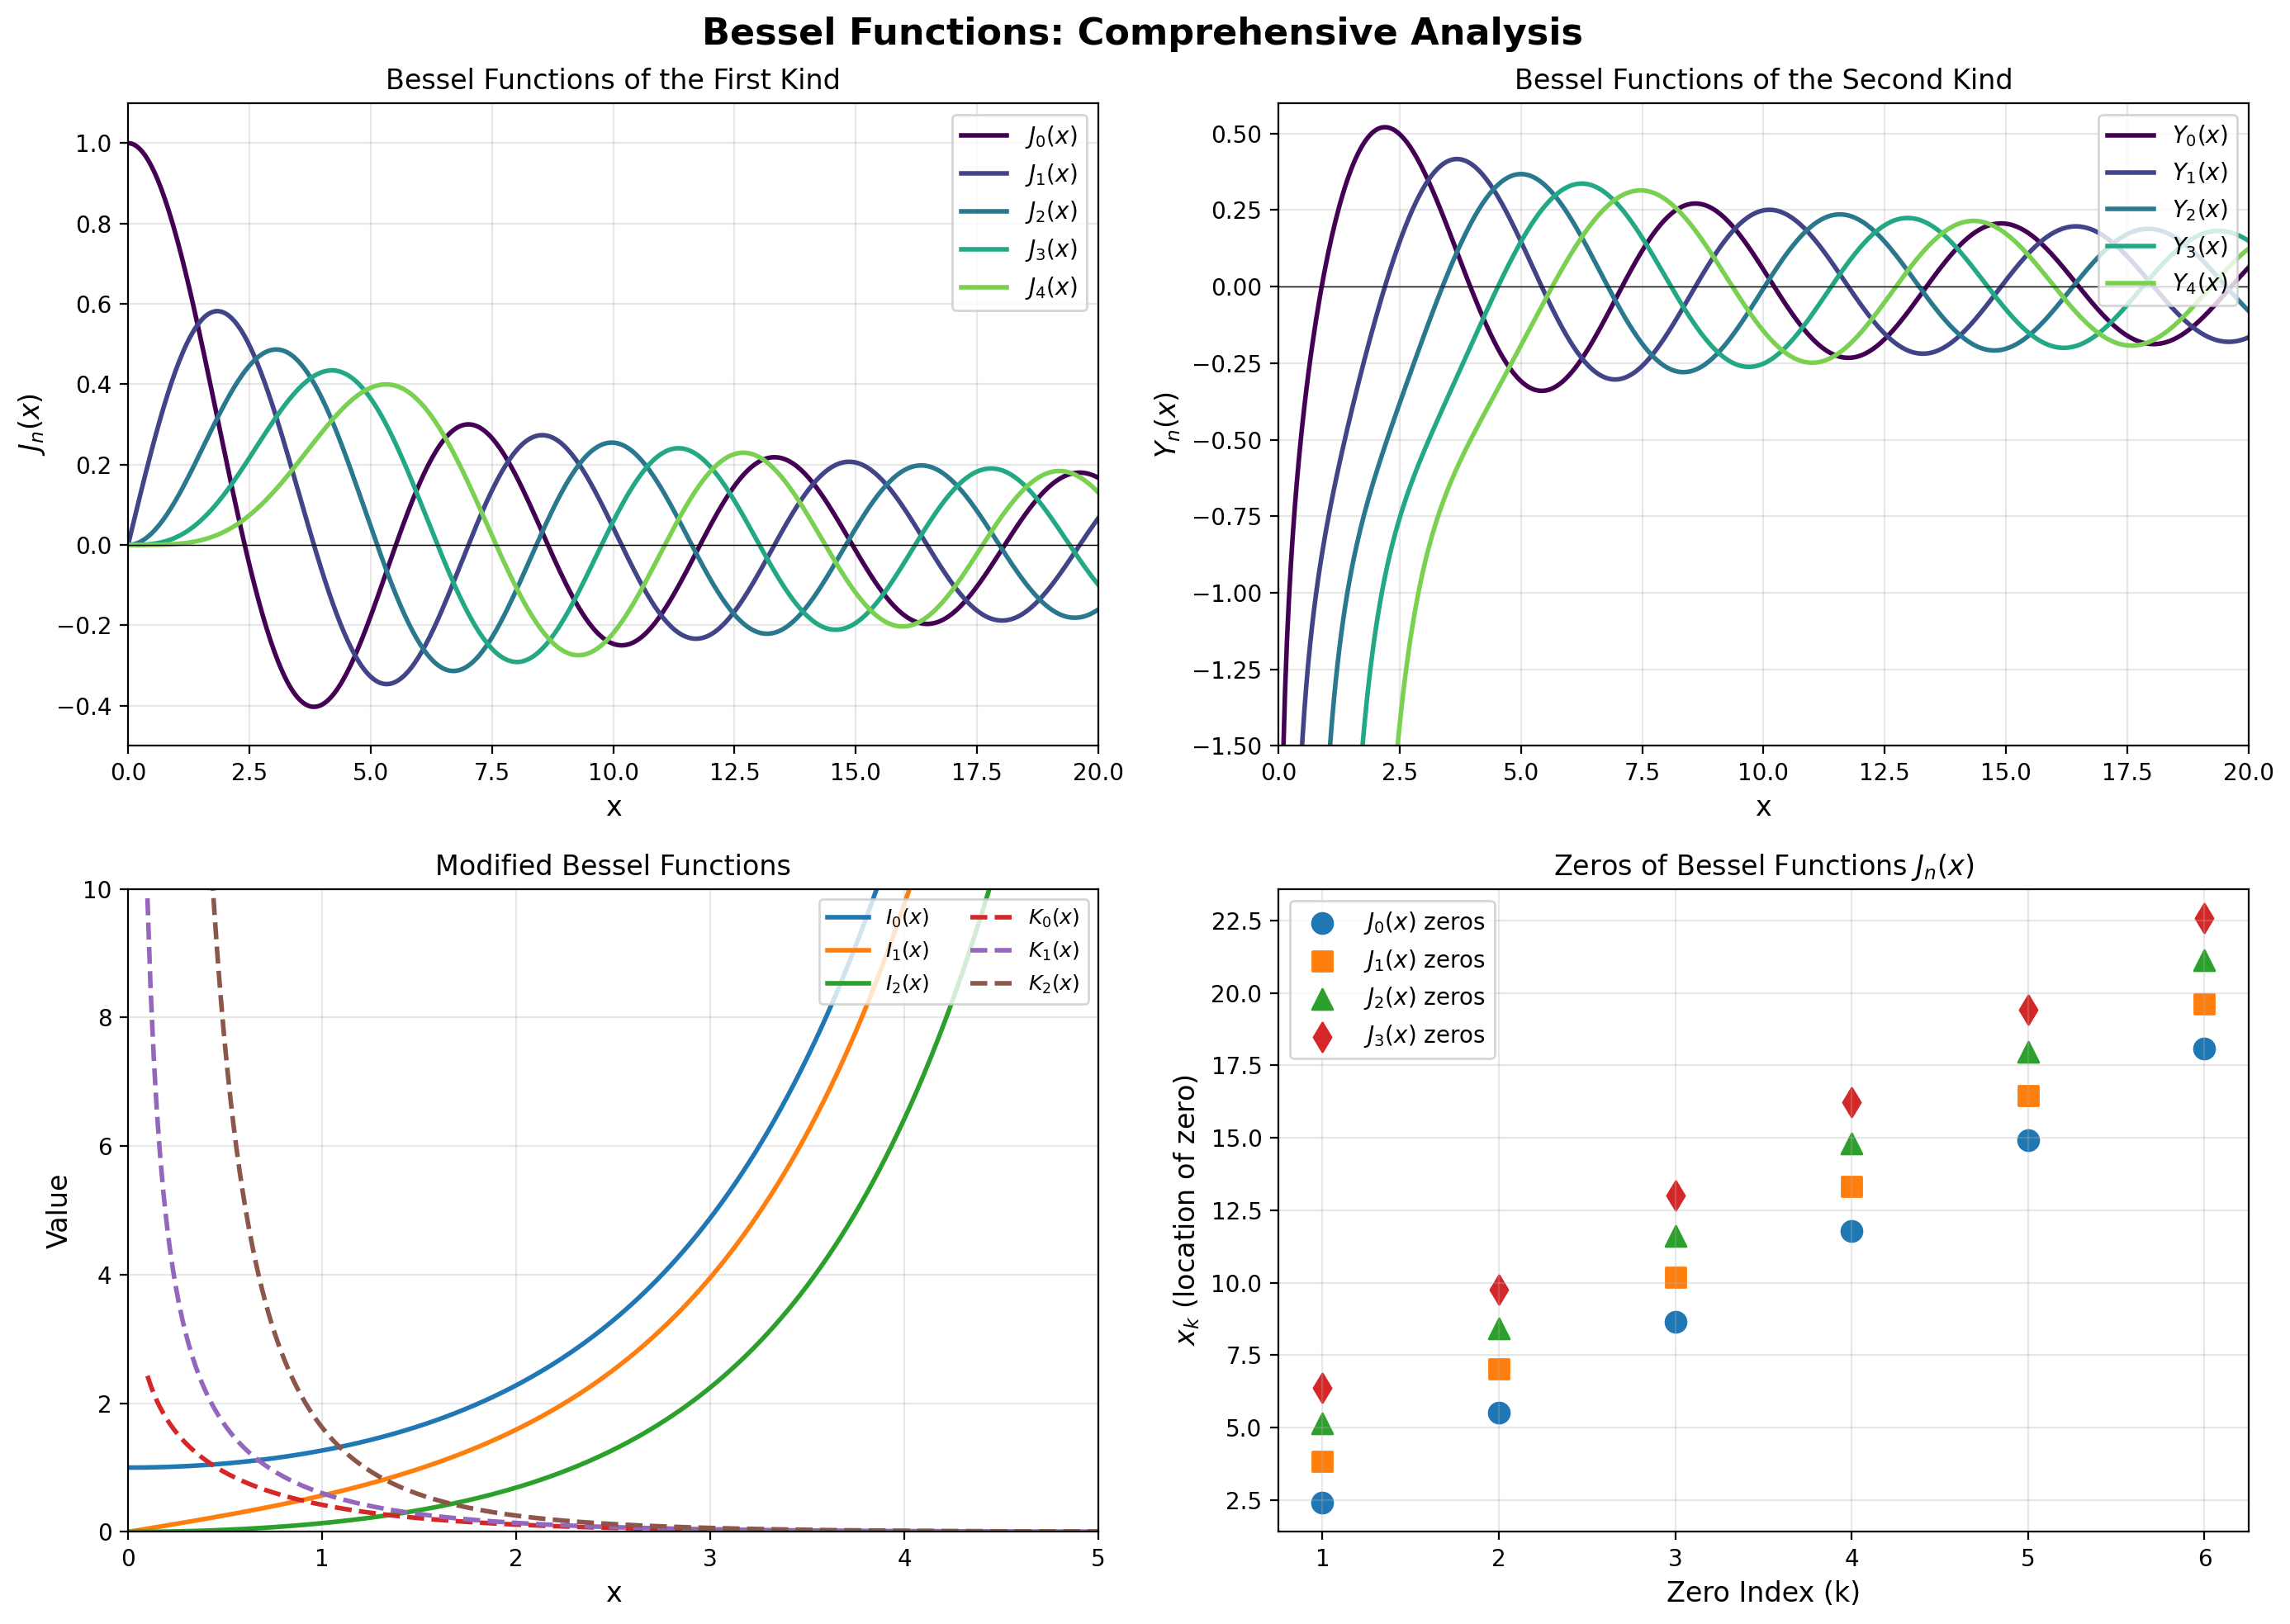

Figure saved as 'plot.png'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# Set up the figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bessel Functions: Comprehensive Analysis', fontsize=16, fontweight='bold')

# Define x range for plotting
x = np.linspace(0.01, 20, 500)

# Plot 1: Bessel Functions of the First Kind J_n(x)
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 0.8, 5))
for n, color in zip(range(5), colors):
    y = special.jv(n, x)
    ax1.plot(x, y, label=f'$J_{n}(x)$', color=color, linewidth=2)

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$J_n(x)$', fontsize=12)
ax1.set_title('Bessel Functions of the First Kind', fontsize=12)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 20)
ax1.set_ylim(-0.5, 1.1)
ax1.axhline(y=0, color='k', linewidth=0.5)

# Plot 2: Bessel Functions of the Second Kind Y_n(x)
ax2 = axes[0, 1]
x_y = np.linspace(0.1, 20, 500)  # Start from 0.1 to avoid singularity at 0
for n, color in zip(range(5), colors):
    y = special.yv(n, x_y)
    ax2.plot(x_y, y, label=f'$Y_{n}(x)$', color=color, linewidth=2)

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('$Y_n(x)$', fontsize=12)
ax2.set_title('Bessel Functions of the Second Kind', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 20)
ax2.set_ylim(-1.5, 0.6)
ax2.axhline(y=0, color='k', linewidth=0.5)

# Plot 3: Modified Bessel Functions I_n(x) and K_n(x)
ax3 = axes[1, 0]
x_mod = np.linspace(0.01, 5, 300)

# I_n functions (grow exponentially)
for n in range(3):
    y_i = special.iv(n, x_mod)
    ax3.plot(x_mod, y_i, label=f'$I_{n}(x)$', linewidth=2, linestyle='-')

# K_n functions (decay exponentially)
x_k = np.linspace(0.1, 5, 300)  # Avoid singularity at 0
for n in range(3):
    y_k = special.kv(n, x_k)
    ax3.plot(x_k, y_k, label=f'$K_{n}(x)$', linewidth=2, linestyle='--')

ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('Value', fontsize=12)
ax3.set_title('Modified Bessel Functions', fontsize=12)
ax3.legend(loc='upper right', fontsize=9, ncol=2)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 10)

# Plot 4: Zeros of Bessel Functions J_n(x)
ax4 = axes[1, 1]

# Find and plot zeros
n_zeros = 6
orders = [0, 1, 2, 3]
markers = ['o', 's', '^', 'd']

for n, marker in zip(orders, markers):
    zeros = special.jn_zeros(n, n_zeros)
    ax4.scatter(range(1, n_zeros + 1), zeros, label=f'$J_{n}(x)$ zeros', 
                marker=marker, s=80)

ax4.set_xlabel('Zero Index (k)', fontsize=12)
ax4.set_ylabel('$x_k$ (location of zero)', fontsize=12)
ax4.set_title('Zeros of Bessel Functions $J_n(x)$', fontsize=12)
ax4.legend(loc='upper left', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(1, n_zeros + 1))

plt.tight_layout()
plt.savefig('bessel_functions_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved as 'plot.png'")

## Numerical Verification

Let us verify some key properties of Bessel functions numerically.

In [2]:
# Verify recurrence relation: J_{n-1}(x) + J_{n+1}(x) = (2n/x) * J_n(x)
print("Verification of Recurrence Relation")
print("="*50)
print("\nJ_{n-1}(x) + J_{n+1}(x) = (2n/x) * J_n(x)\n")

x_test = np.array([1.0, 2.5, 5.0, 10.0])
n_test = 2

for x_val in x_test:
    lhs = special.jv(n_test - 1, x_val) + special.jv(n_test + 1, x_val)
    rhs = (2 * n_test / x_val) * special.jv(n_test, x_val)
    error = abs(lhs - rhs)
    print(f"x = {x_val:5.1f}: LHS = {lhs:10.6f}, RHS = {rhs:10.6f}, Error = {error:.2e}")

Verification of Recurrence Relation

J_{n-1}(x) + J_{n+1}(x) = (2n/x) * J_n(x)

x =   1.0: LHS =   0.459614, RHS =   0.459614, Error = 5.55e-17
x =   2.5: LHS =   0.713694, RHS =   0.713694, Error = 0.00e+00
x =   5.0: LHS =   0.037252, RHS =   0.037252, Error = 6.94e-18
x =  10.0: LHS =   0.101852, RHS =   0.101852, Error = 0.00e+00


In [3]:
# Compute first few zeros of J_0 and verify they satisfy J_0(x) = 0
print("\nZeros of J_0(x)")
print("="*50)

zeros_j0 = special.jn_zeros(0, 10)
print("\n k     x_k          J_0(x_k)")
print("-" * 35)
for k, zero in enumerate(zeros_j0, 1):
    value = special.jv(0, zero)
    print(f"{k:2d}   {zero:10.6f}   {value:12.2e}")


Zeros of J_0(x)

 k     x_k          J_0(x_k)
-----------------------------------
 1     2.404826       1.02e-16
 2     5.520078      -1.41e-17
 3     8.653728       1.04e-16
 4    11.791534      -1.77e-16
 5    14.930918      -3.52e-16
 6    18.071064       2.44e-16
 7    21.211637       1.63e-17
 8    24.352472      -1.48e-16
 9    27.493479       2.46e-16
10    30.634606       7.75e-17


In [4]:
# Verify orthogonality relation numerically
from scipy import integrate

print("\nOrthogonality Verification")
print("="*50)
print("\n∫₀¹ x J_n(α_nm x) J_n(α_nk x) dx = 0 for m ≠ k\n")

n = 0  # Order of Bessel function
zeros = special.jn_zeros(n, 4)

print("Orthogonality matrix (should be diagonal):")
print()

# Compute orthogonality integrals
for m in range(4):
    row = []
    for k in range(4):
        # Integrand: x * J_n(alpha_m * x) * J_n(alpha_k * x)
        integrand = lambda x, am=zeros[m], ak=zeros[k]: (
            x * special.jv(n, am * x) * special.jv(n, ak * x)
        )
        result, _ = integrate.quad(integrand, 0, 1)
        row.append(result)
    print(f"  [{' '.join(f'{v:8.4f}' for v in row)}]")


Orthogonality Verification

∫₀¹ x J_n(α_nm x) J_n(α_nk x) dx = 0 for m ≠ k

Orthogonality matrix (should be diagonal):

  [  0.1348  -0.0000   0.0000  -0.0000]
  [ -0.0000   0.0579  -0.0000  -0.0000]
  [  0.0000  -0.0000   0.0368   0.0000]
  [ -0.0000  -0.0000   0.0000   0.0270]


## Physical Application: Vibrating Circular Membrane

The displacement $u(r, \theta, t)$ of a vibrating circular membrane satisfies:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$$

with boundary condition $u(a, \theta, t) = 0$ (fixed at edge $r = a$).

The normal modes are:

$$u_{mn}(r, \theta, t) = J_m\left(\frac{\alpha_{mn} r}{a}\right) \cos(m\theta) \cos(\omega_{mn} t)$$

where $\alpha_{mn}$ is the $n$-th zero of $J_m(x)$ and $\omega_{mn} = c\alpha_{mn}/a$.

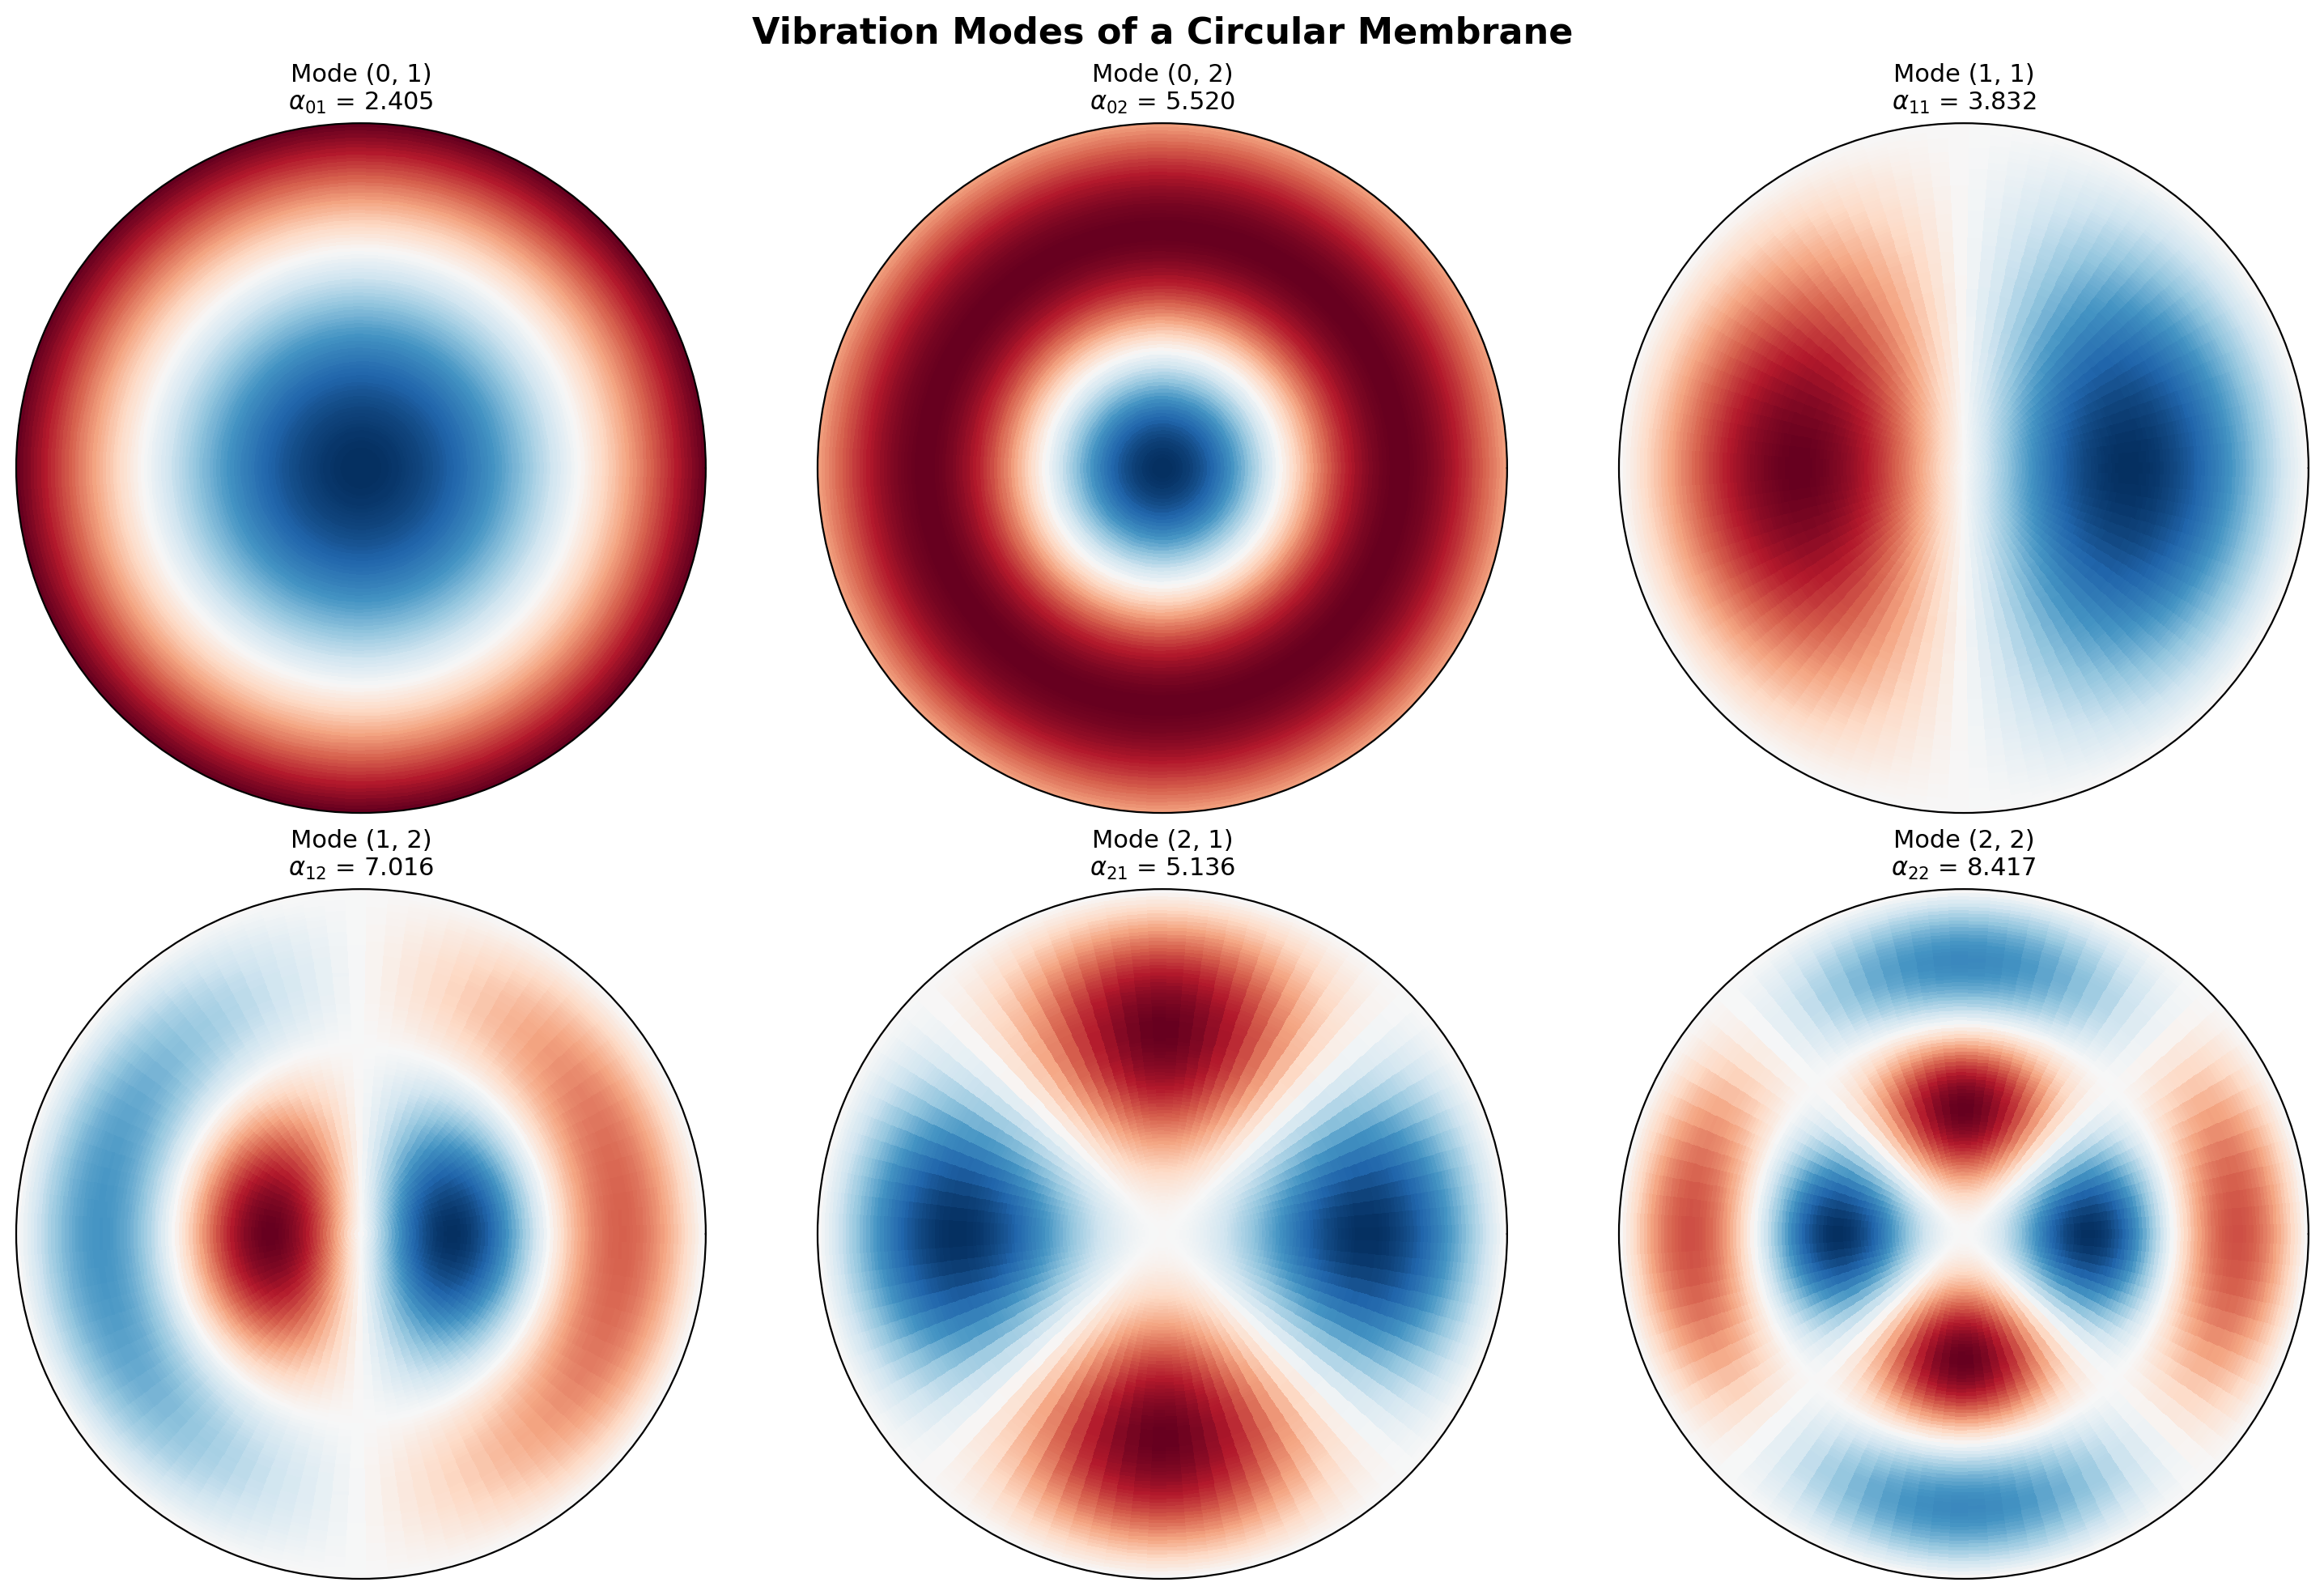


Mode frequencies are proportional to α_mn:
Higher zeros → higher frequency oscillations


In [5]:
# Visualize vibration modes of a circular membrane
from matplotlib import cm

fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': 'polar'})
fig.suptitle('Vibration Modes of a Circular Membrane', fontsize=16, fontweight='bold')

# Create radial and angular grids
r = np.linspace(0, 1, 100)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)

# Different modes to display
modes = [(0, 1), (0, 2), (1, 1), (1, 2), (2, 1), (2, 2)]

for ax, (m, n) in zip(axes.flat, modes):
    # Get the n-th zero of J_m
    alpha_mn = special.jn_zeros(m, n)[-1]
    
    # Compute the mode shape
    Z = special.jv(m, alpha_mn * R) * np.cos(m * Theta)
    
    # Plot
    c = ax.pcolormesh(Theta, R, Z, cmap='RdBu', shading='auto')
    ax.set_title(f'Mode ({m}, {n})\n$\\alpha_{{{m}{n}}}$ = {alpha_mn:.3f}', fontsize=11)
    ax.set_rticks([])  # Remove radial ticks
    ax.set_thetagrids([])  # Remove angular ticks

plt.tight_layout()
plt.show()

print("\nMode frequencies are proportional to α_mn:")
print("Higher zeros → higher frequency oscillations")

## Summary

Bessel functions are fundamental solutions in mathematical physics with wide-ranging applications:

1. **$J_n(x)$** - Regular at origin, oscillatory behavior for large $x$
2. **$Y_n(x)$** - Singular at origin, provides second linearly independent solution
3. **$I_n(x)$, $K_n(x)$** - Modified Bessel functions for different differential equation

Key takeaways:
- Recurrence relations allow efficient computation
- Orthogonality enables Fourier-Bessel series expansions
- Zeros determine natural frequencies in physical systems
- Asymptotic forms simplify analysis for large arguments